In [1]:
from cathub.cathubsql import CathubSQL

db = CathubSQL()

In [2]:
pub_id='RolingConfigurational2017'
dataframe = db.get_dataframe(pub_id=pub_id)
dataframe.to_pickle(pub_id + '.pickle')

Querying database



In [3]:
print(dataframe)

     reaction_id chemical_composition surface_composition facet sites  \
0           8037                 Ni37                  Ni   211  None   
1           8038                 Ni36                  Ni   211  None   
2           8039                 Ni38                  Ni   211  None   
3           8040                 Ni25                  Ni   100  None   
4           8041                 Ni25                  Ni   100  None   
..           ...                  ...                 ...   ...   ...   
99          8136                 Pt26                  Pt   100  None   
100         8137                 Pt24                  Pt   111  None   
101         8138                 Pt25                  Pt   111  None   
102         8139                 Pt26                  Pt   111  None   
103         8140                 Pt27                  Pt   111  None   

    coverages                reactants       products  reaction_energy  \
0        None  {'star': 1, 'Nigas': 1}  {'Nistar'

In [4]:
def same_surface_gas(atoms_name):
    name_list=atoms_name.copy()
    if 'star' in name_list:
        name_list.remove('star')
    sorted_name = sorted(name_list)
    name1 = sorted_name[0]
    name2 = sorted_name[1]
    if name1.endswith('gas') and name2.endswith('star') and name1[:-3]==name2[:-4]:
        return True
    return False

In [5]:
unitary_df=dataframe[dataframe['atoms_name'].apply(same_surface_gas)]
print(unitary_df)

     reaction_id chemical_composition surface_composition facet sites  \
0           8037                 Ni37                  Ni   211  None   
1           8038                 Ni36                  Ni   211  None   
2           8039                 Ni38                  Ni   211  None   
3           8040                 Ni25                  Ni   100  None   
4           8041                 Ni25                  Ni   100  None   
..           ...                  ...                 ...   ...   ...   
99          8136                 Pt26                  Pt   100  None   
100         8137                 Pt24                  Pt   111  None   
101         8138                 Pt25                  Pt   111  None   
102         8139                 Pt26                  Pt   111  None   
103         8140                 Pt27                  Pt   111  None   

    coverages                reactants       products  reaction_energy  \
0        None  {'star': 1, 'Nigas': 1}  {'Nistar'

In [6]:
set(unitary_df.facet.tolist())

{'100', '111', '211'}

In [7]:
unitary_df[(unitary_df['facet']=='100') &
           (unitary_df['surface_composition']=='Ag')].chemical_composition.sort_values() #27

59    Ag24
55    Ag25
56    Ag25
57    Ag26
60    Ag26
58    Ag27
Name: chemical_composition, dtype: object

In [8]:
unitary_df[(unitary_df['facet']=='111') &
           (unitary_df['surface_composition']=='Ag')].chemical_composition.sort_values() #27

61    Ag24
62    Ag25
63    Ag26
64    Ag27
Name: chemical_composition, dtype: object

In [9]:
unitary_df[(unitary_df['facet']=='211') &
           (unitary_df['surface_composition']=='Ag')].chemical_composition.sort_values() #38

53    Ag36
52    Ag37
54    Ag38
Name: chemical_composition, dtype: object

In [10]:
df = unitary_df[((unitary_df['facet'] == '100') & (unitary_df['chemical_composition'].str.endswith('27')))
               | ((unitary_df['facet'] == '111') & (unitary_df['chemical_composition'].str.endswith('27')))
               | ((unitary_df['facet'] == '211') & (unitary_df['chemical_composition'].str.endswith('38')))]
df = df[['surface_composition', 'facet', 'reaction_energy', 'atoms_name', 'atoms_id']]
df = df.sort_values(by='surface_composition').reset_index(drop=True)
df

,surface_composition,facet,reaction_energy,atoms_name,atoms_id
0,Ag,111,-2.381647,"[star, Aggas, Agstar]","[228b270d5862e6d1d8b0ef58c15459bb, 4d6af1efe05..."
1,Ag,100,-2.280962,"[Aggas, Agstar, star]","[4d6af1efe05cd58036174966bc386544, 7326210ae79..."
2,Ag,211,-2.154433,"[Aggas, Agstar, star]","[4d6af1efe05cd58036174966bc386544, cad32b2b9d8..."
3,Au,111,-2.841860,"[Augas, star, Austar]","[47dc8c8d2a2441be45f0c9dc7f285314, 9669c1b1c58..."
4,Au,100,-2.662566,"[Austar, Augas, star]","[313319ace28e8d2c71c3cd3b6befb903, 47dc8c8d2a2..."
5,Au,211,-2.614305,"[Augas, Austar, star]","[47dc8c8d2a2441be45f0c9dc7f285314, 8eeaec1edec..."
6,Cu,111,-3.642476,"[Custar, Cugas, star]","[7b3a3a9400f9851e25b77761a46f8dae, 90f8a21d404..."
7,Cu,211,-3.284493,"[star, Custar, Cugas]","[3b81ab412161cb8fc14a556eaaabf374, 4d232cd5f9f..."
8,Cu,100,-3.423677,"[Cugas, Custar, star]","[90f8a21d4043263dbfff3211863e6665, a8bf5f275a4..."
9,Ir,211,-7.379176,"[star, Irgas, Irstar]","[4b5eba38a3dd033068f6faf136b2e4e2, 90bc179e954..."


In [11]:
df['initial_atoms'] = [item['atoms_id'][i] 
                     for item in df.to_dict('records')
                     for i, name in enumerate(item['atoms_name']) 
                     if name == 'star']
df['final_atoms'] = [item['atoms_id'][i] 
                   for item in df.to_dict('records')
                   for i, name in enumerate(item['atoms_name']) 
                   if name.endswith('star') & (len(name)>4)]
df['gas_atoms'] = [item['atoms_id'][i] 
                 for item in df.to_dict('records') 
                 for i, name in enumerate(item['atoms_name']) 
                 if name.endswith('gas')]

df = df.drop(['atoms_name', 'atoms_id'], axis=1)
df

,surface_composition,facet,reaction_energy,initial_atoms,final_atoms,gas_atoms
0,Ag,111,-2.381647,228b270d5862e6d1d8b0ef58c15459bb,cfd53a5d0dd5a5063c4b124f532056d9,4d6af1efe05cd58036174966bc386544
1,Ag,100,-2.280962,fce4f7022c772d8dc2e5ae6ae80c6cff,7326210ae79585d127c640fa8c78cded,4d6af1efe05cd58036174966bc386544
2,Ag,211,-2.154433,d30b50142c16fc88baeceac8b9d67347,cad32b2b9d81b9dfb8474b0f64f81d8c,4d6af1efe05cd58036174966bc386544
3,Au,111,-2.841860,9669c1b1c589b00961bb12bea755e38a,db46bb478ea352c7dfc08ccbdce43282,47dc8c8d2a2441be45f0c9dc7f285314
4,Au,100,-2.662566,6750e4bb2ade84323c2698ddde06165f,313319ace28e8d2c71c3cd3b6befb903,47dc8c8d2a2441be45f0c9dc7f285314
5,Au,211,-2.614305,f76cec7f7b68a4e359c49d1186d644a8,8eeaec1edec312e8f58d734ee9e984bd,47dc8c8d2a2441be45f0c9dc7f285314
6,Cu,111,-3.642476,e080c29e081ce0dce86b3ce65ab4d665,7b3a3a9400f9851e25b77761a46f8dae,90f8a21d4043263dbfff3211863e6665
7,Cu,211,-3.284493,3b81ab412161cb8fc14a556eaaabf374,4d232cd5f9f0a36275e67cda80756d0c,90f8a21d4043263dbfff3211863e6665
8,Cu,100,-3.423677,b0c72fd6e4a91511ef40a5630c42a7dc,a8bf5f275a4874a4ef782a5f88e5acd0,90f8a21d4043263dbfff3211863e6665
9,Ir,211,-7.379176,4b5eba38a3dd033068f6faf136b2e4e2,e082275cafbf8fbe6f0a58a0d3e11886,90bc179e9543b048e3f6b1d234788285


In [12]:
def id_to_energy(atoms_id):
    return  db.get_atoms_for_id(atoms_id=atoms_id)[0].get_total_energy()

df['initial_energy'] = df['initial_atoms'].apply(id_to_energy)
df['final_energy'] = df['final_atoms'].apply(id_to_energy)
df['gas_energy'] = df['gas_atoms'].apply(id_to_energy)

df = df.drop(['initial_atoms', 'final_atoms', 'gas_atoms'], axis=1)
df

,surface_composition,facet,reaction_energy,initial_energy,final_energy,gas_energy
0,Ag,111,-2.381647,-108616.586693,-112639.880722,-4020.912382
1,Ag,100,-2.280962,-108616.098671,-112639.292016,-4020.912382
2,Ag,211,-2.154433,-152865.882056,-156888.948871,-4020.912382
3,Au,111,-2.841860,-42261.682572,-43827.378975,-1562.854543
4,Au,100,-2.662566,-42260.984716,-43826.501825,-1562.854543
5,Au,211,-2.614305,-59477.439290,-61042.908138,-1562.854543
6,Cu,111,-3.642476,-148355.054462,-153850.431875,-5491.734937
7,Cu,211,-3.284493,-208793.157965,-214288.177395,-5491.734937
8,Cu,100,-3.423677,-148354.354093,-153849.512706,-5491.734937
9,Ir,211,-7.379176,-93989.192118,-96463.624055,-2467.052761


In [13]:
elements = set(df.surface_composition.tolist())
elements

{'Ag', 'Au', 'Cu', 'Ir', 'Ni', 'Pd', 'Pt', 'Rh'}

In [14]:
import pandas as pd
# # cathub reaction: * + M(g) -> *M
# # dissolution reaction: * -> *M_vac + M^n+(aq) + ne-
# #     can be expressed: *M -> * + M^n+(aq) + ne-

# # standard reduction potential (U_0)
# # E_M(s) = E_M^n+(aq) - neU_0
# potential_df = pd.DataFrame({'metal': ['Ag', 'Au', 'Cu', 'Ir', 'Ni', 'Pd', 'Pt', 'Rh'],
#                              'ion': ['Ag+', 'Au+', 'Cu2+', 'Ir3+', 'Ni2+', 'Pd2+', 'Pt2+', 'Rh3+'],
#                              'potential': [0.80, 1.69, 0.34, 1.16, -0.23, 0.92, 1.18, 0.76]
#                             })

# def calculate_electron(ion):
#     electron = ion[2:].rstrip('+')
#     if electron:
#         return electron
#     else:
#         return 1

# potential_df['electron'] = potential_df['ion'].apply(calculate_electron)
# print(potential_df)

# # E_M(s) = E_M^n+(aq) - neU
# # cathub reaction energy: dE_cathub = { E_*M } - { E_* + E_M(g) }
# # dissolution energy: dE_diss = { E_* + E_M^n+(aq) - neU } - { E_*M }
# #                             = [ E_M^n+(aq) - neU - E_M(g) ] - [ { E_*M } - { E_* + E_M(g) } ]
# #                             = [ E_M^n+(aq) - neU - E_M(g) ] - dE_cathub
# #                             = [ E_M(s) - E_M(g) ] - ne{ U - U_0 } - dE_cathub
# # dissolution potential: U_diss = [ E_M(s) - E_M(g) - dE_cathub ]/ne + U_0

In [15]:
# from pymatgen.ext.matproj import MPRester
from mp_api.client import MPRester

# mpr = MPRester(api_key='A0tSyMUEWhjK3OCyByZC')
mpr = MPRester(api_key='3jSckrUWEJ94DEo93ZOlCwNd2B1BHerV')

/home/hyeonjung/anaconda3/envs/py3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
mpr.get_ion_reference_data_for_chemsys(['Ag'])

[{'identifier': 'Ag[+]',
  'formula': 'Ag[+]',
  'data': {'charge': {'display': '1.0',
    'value': 1.0,
    'error': None,
    'unit': ''},
   'ΔGᶠ': {'display': '76.99 kJ/mol',
    'value': 76.99,
    'error': None,
    'unit': 'kJ/mol'},
   'MajElements': 'Ag',
   'RefSolid': 'Ag2O',
   'ΔGᶠRefSolid': {'display': '-11.18 kJ/mol',
    'value': -11.18,
    'error': None,
    'unit': 'kJ/mol'},
   'reference': 'D. D. Wagman et al., Selected values of chemical thermodynamic properties, NBS Technical note 270, Washington; 1968-1971'}},
 {'identifier': 'Ag[2+]',
  'formula': 'Ag[2+]',
  'data': {'charge': {'display': '2.0',
    'value': 2.0,
    'error': None,
    'unit': ''},
   'ΔGᶠ': {'display': '265.92 kJ/mol',
    'value': 265.92,
    'error': None,
    'unit': 'kJ/mol'},
   'MajElements': 'Ag',
   'RefSolid': 'Ag2O',
   'ΔGᶠRefSolid': {'display': '-11.18 kJ/mol',
    'value': -11.18,
    'error': None,
    'unit': 'kJ/mol'},
   'reference': 'M. Pourbaix, Atlas of electrochemical equ

In [17]:
ion_data = mpr.get_ion_reference_data()
# ion_data = mpr.get_ion_reference_data_for_chemsys(['Ag'])
ion_data = [data for data in ion_data if ((data["data"]["MajElements"] in elements) &
                                         (not 'O' in data["formula"]) &
                                         (not 'H' in data["formula"]))]

# ion_data

In [18]:
ion_df = pd.DataFrame()
ion_df['formula'] = [item['formula'] for item in ion_data]
ion_df['metal'] = [item['data']['MajElements'] for item in ion_data]
ion_df['charge'] = [item['data']['charge']['value'] for item in ion_data]
ion_df['energy'] = [item['data']['ΔGᶠ']['value']*0.0104 for item in ion_data] # 1 kJ/mol = 0.0104 eV/atom
ion_df = ion_df.sort_values(by='formula').reset_index(drop=True)

In [19]:
df.drop(df[df['surface_composition'] == 'Ir'].index, inplace=True)

In [20]:
if 'Ir' in elements:
        elements.remove('Ir')
elements

{'Ag', 'Au', 'Cu', 'Ni', 'Pd', 'Pt', 'Rh'}

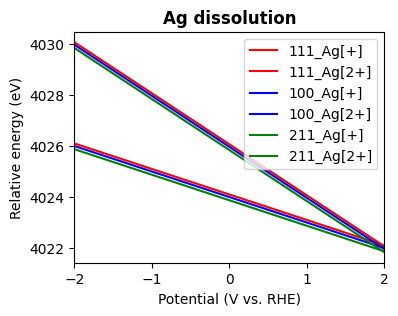

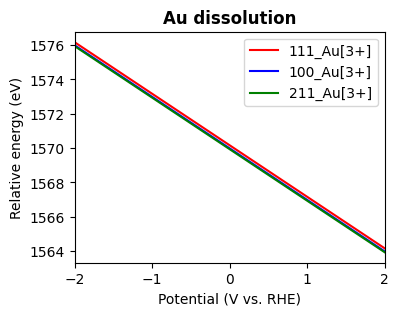

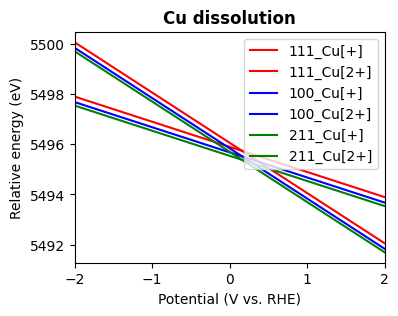

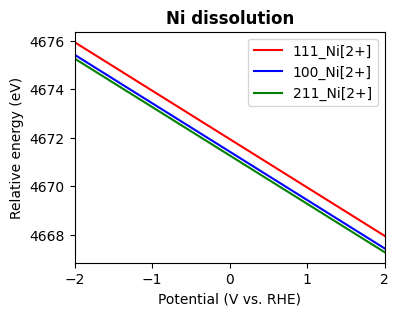

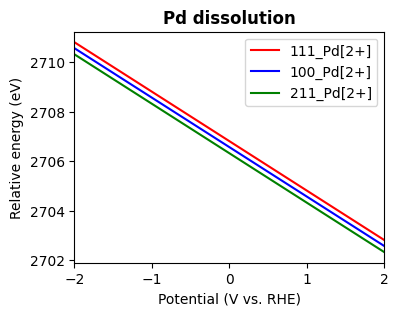

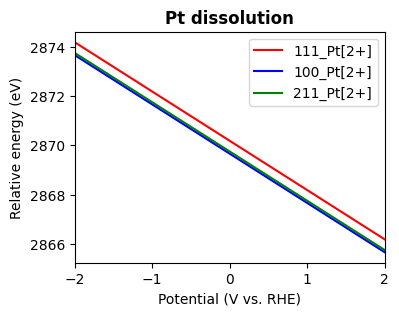

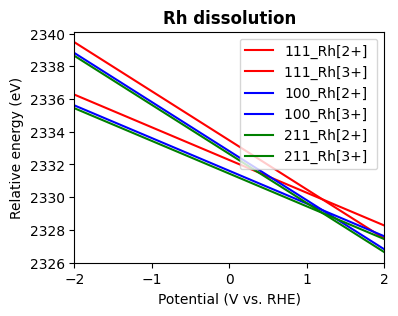

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.linspace(-2.0, 2.0, 10)
colors = {'111':'red', '100':'blue', '211':'green'}

for element in sorted(elements):
    plt.figure(figsize=(4,3))

    for facet in ['111', '100', '211']:
        formulas = [formula for index, formula in ion_df['formula'].items()
                    if ion_df.loc[index, 'metal'] == element]
        for formula in formulas:
            label = facet+'_'+formula
            
            # gas adsorption energy (QE): dE_cathub = E(*M) - { E(*) + E(M(g)) }
            # standard reduction potential: 
            
            # dE_dissolution = -neU + { E(*) + E(M^n+) - E(*M) }
            #                = -neU -  dE_cathub + E(M^n+) - E(M(g))
            ion_index = ion_df.index[(ion_df['formula'] == formula)]
            E_ion = ion_df.energy[ion_index].values[0]
            ne = ion_df.charge[ion_index].values[0]
            
            reaction_index = df.index[((df['surface_composition'] == element) & (df['facet'] == facet))]
            E_ = df.initial_energy[reaction_index].values[0]
            E_ads = df.final_energy[reaction_index].values[0]
            
            a = -ne
            b = E_+E_ion-E_ads
            y = a*x + b
            plt.plot(x, y, label=label.format(a, b), color=colors[facet])
            
    plt.xlim(-2.0,2.0)
    plt.xlabel('Potential (V vs. RHE)')
    plt.ylabel('Relative energy (eV)')
    plt.title(f'{element} dissolution', weight='bold')
    
    plt.legend()
    plt.show()
    plt.close()